In [1]:
# First download data (Github allows file size < 25Mb)
# !git clone https://github.com/chenyk1990/mldata 
# !cp -r mldata/eq/signalnoise ./
# 
# Following is based on the EQCCT environment
# conda create -n eqcct python=3.7.16
# conda activate eqcct
# conda install ipython notebook
# pip install obspy tqdm matplotlib-scalebar tensorflow==2.8.0 protobuf==3.20.1 pandas==1.3.5 scikit-learn==1.0.2
# conda activate eqcct
#
# Install PyNTFA package
# pip install git+https://github.com/chenyk1990/pyntfa

In [2]:
!ls signalnoise/

noise2082-1.npy  noise2082-3.npy  signal100-1.npy  signal100-3.npy
noise2082-10.npy noise2082-4.npy  signal100-10.npy signal100-4.npy
noise2082-11.npy noise2082-5.npy  signal100-11.npy signal100-5.npy
noise2082-12.npy noise2082-6.npy  signal100-12.npy signal100-6.npy
noise2082-13.npy noise2082-7.npy  signal100-13.npy signal100-7.npy
noise2082-14.npy noise2082-8.npy  signal100-14.npy signal100-8.npy
noise2082-2.npy  noise2082-9.npy  signal100-2.npy  signal100-9.npy


In [3]:
import glob
import numpy as np

In [4]:
## Here we load the signal and noise samples
# Noise is manually picked by YKC, this is only a small portion of the whole dataset of TXED 
# Signal is segmented according to analysts' picks in the TexNet catalog

noise=glob.glob("signalnoise/noise*.npy") #this is a file list
noise=[np.load(ii) for ii in noise]       #this is list of numpy array
noise=np.concatenate(noise,axis=2)        #this is a numpy array

signal=glob.glob("signalnoise/signal*.npy") #this is a file list
signal=[np.load(ii) for ii in signal]       #this is list of numpy array
signal=np.concatenate(signal,axis=2)        #this is a numpy array

print(noise.shape)
print(signal.shape)

(6000, 3, 2082)
(6000, 3, 2082)


In [5]:
#Let's plot some sample waveforms
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
def plot(datan,no,mode,figdir='./'):
	'''
	datan: numpy array of signal/noise
	no: number of figures
	mode: in order or random
	'''
	import os
	if os.path.isdir(figdir) == False:  
		os.makedirs(figdir,exist_ok=True)
	data=[]
	if mode==1:
		n_total=datan.shape[2]
		np.random.seed(20212223);
		order=np.arange(n_total);
		np.random.shuffle(order)
		inds=order[0:no]
	
	for jj in range(no):
		if mode==0:
			ii=jj;
		elif mode==1:
			ii=inds[jj];
		else:
			ii=jj;
		data=datan[:,:,ii]
		print("noise %d/%d"%(jj+1,no))
		
		fig, ax = plt.subplots()
		ax.set_xticklabels([]);
		ax.set_yticklabels([]);
		ax1 = fig.add_subplot(311)		
		plt.plot(data[:,0], 'k',label='Z')
		legend_properties = {'weight':'bold'}		
		ymin, ymax = ax1.get_ylim()
		plt.legend(loc = 'upper right', borderaxespad=0., prop=legend_properties)				
		plt.ylabel('Amplitude', fontsize=12) 
		ax1.set_xticklabels([])
		ax = fig.add_subplot(312)				 
		plt.plot(data[:,1], 'k',label='N')
		legend_properties = {'weight':'bold'}		
		ymin, ymax = ax.get_ylim()
		plt.legend(loc = 'upper right', borderaxespad=0., prop=legend_properties)				
		plt.ylabel('Amplitude', fontsize=12) 
		ax.set_xticklabels([])

		ax = fig.add_subplot(313)				 
		plt.plot(data[:,2], 'k',label='E')
		legend_properties = {'weight':'bold'}		
		ymin, ymax = ax.get_ylim()
		plt.legend(loc = 'upper right', borderaxespad=0., prop=legend_properties)				
		plt.ylabel('Amplitude', fontsize=12) 

		ax1.set_title('Waveform #%d'%ii, fontsize=14)

# 		plt.savefig(fname='/noise-'+str(jj)+'.png', format="png")
# 		plt.close() 

noise 1/10
noise 2/10
noise 3/10
noise 4/10
noise 5/10
noise 6/10
noise 7/10
noise 8/10
noise 9/10
noise 10/10


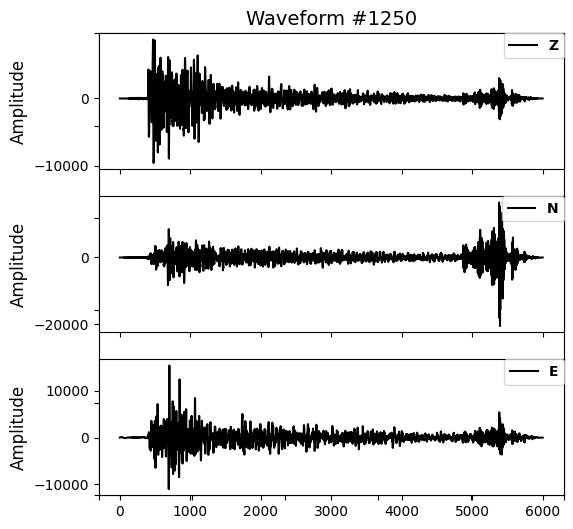

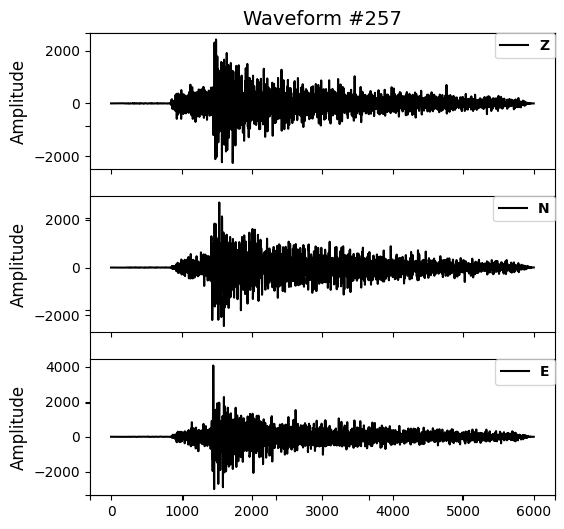

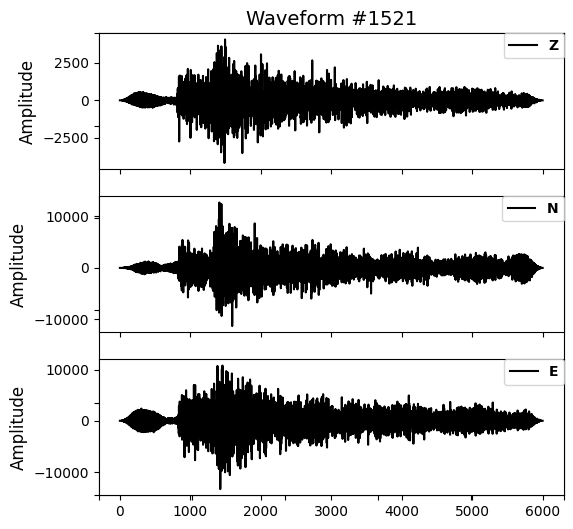

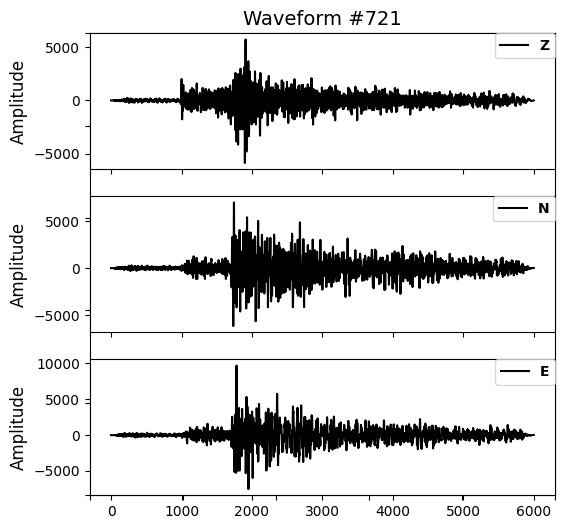

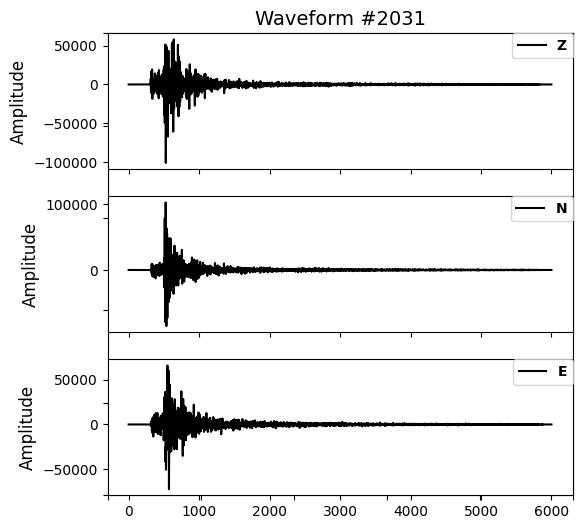

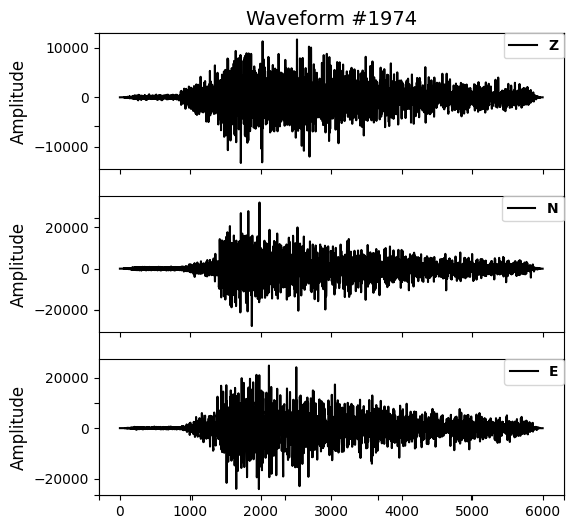

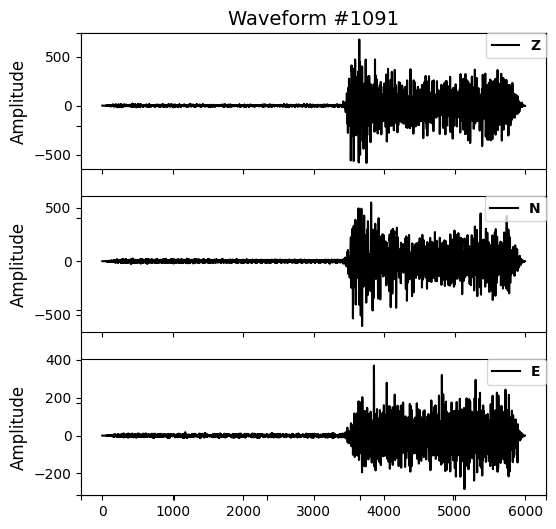

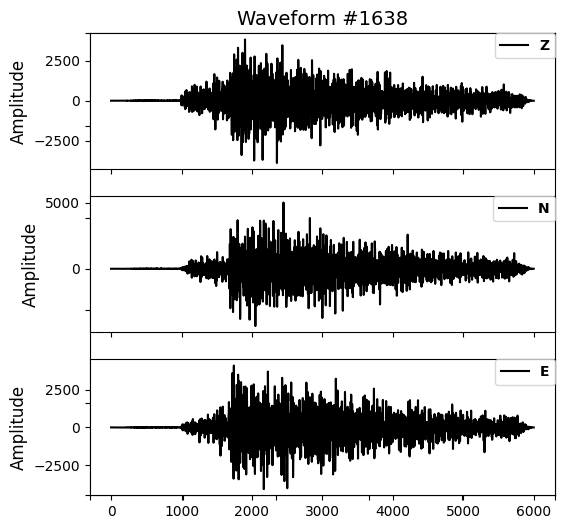

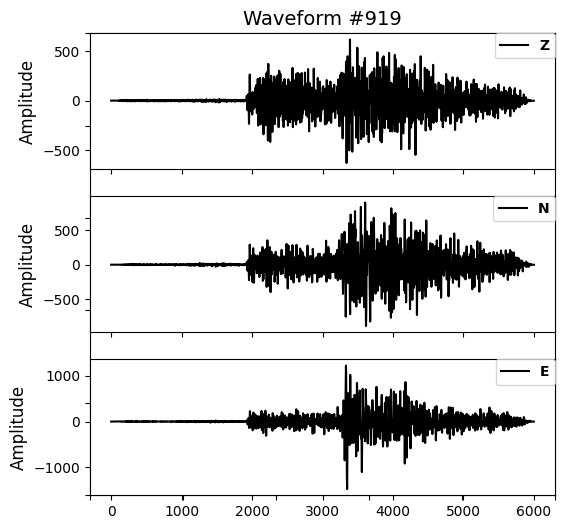

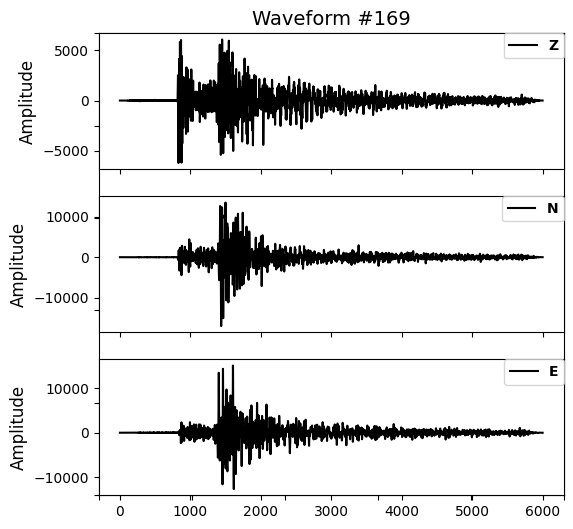

In [6]:
plot(signal,10,1,'./signal/')

noise 1/10
noise 2/10
noise 3/10
noise 4/10
noise 5/10
noise 6/10
noise 7/10
noise 8/10
noise 9/10
noise 10/10


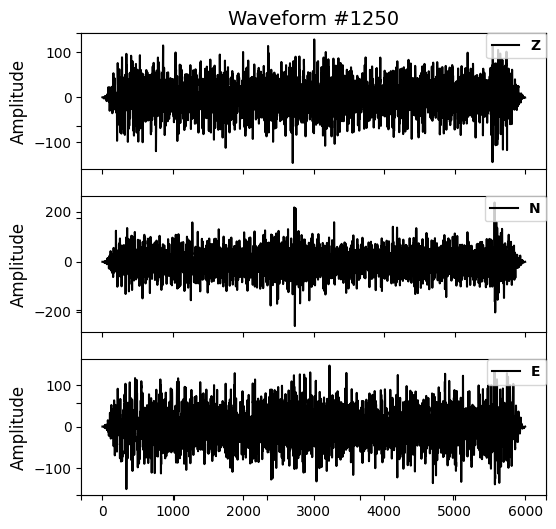

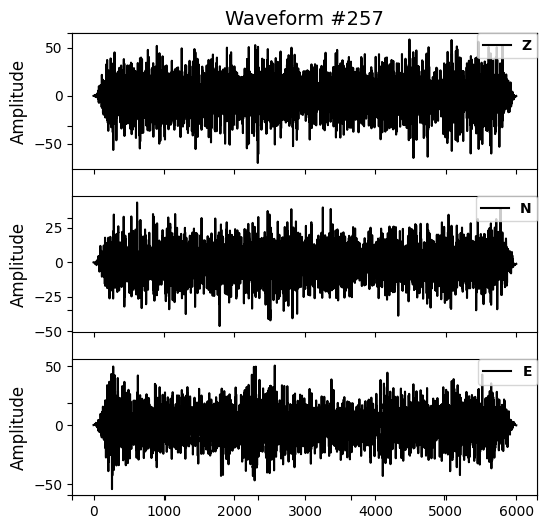

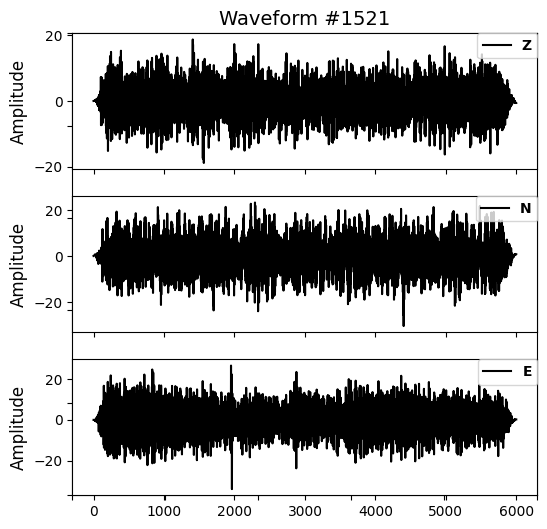

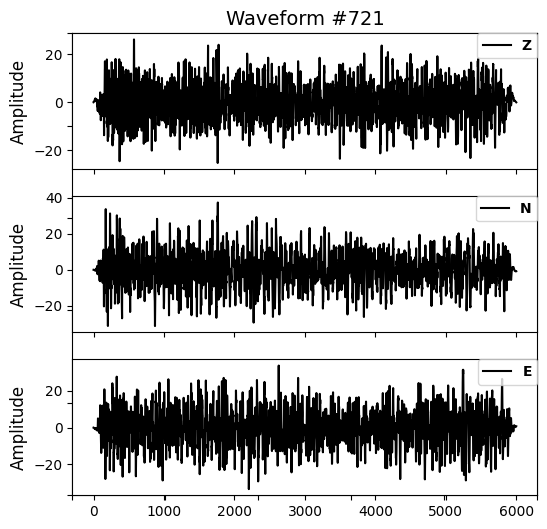

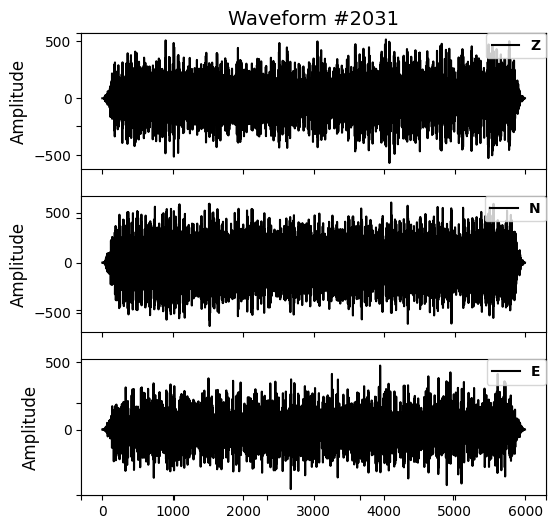

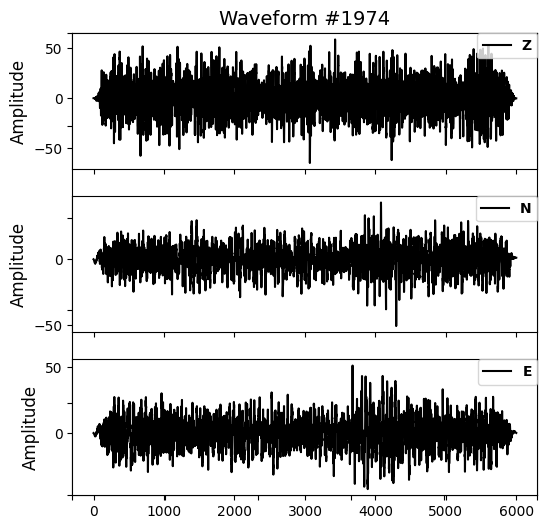

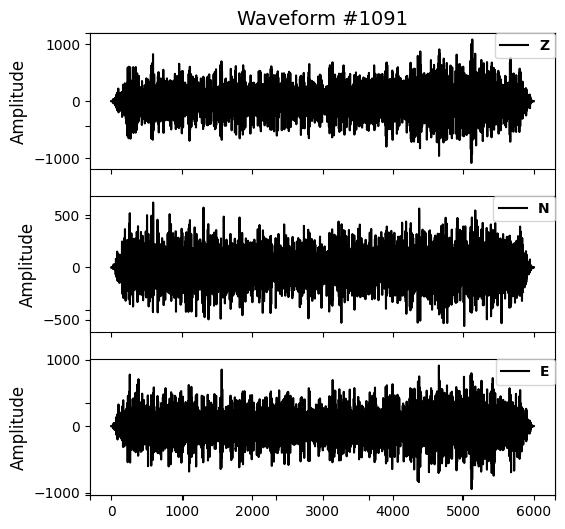

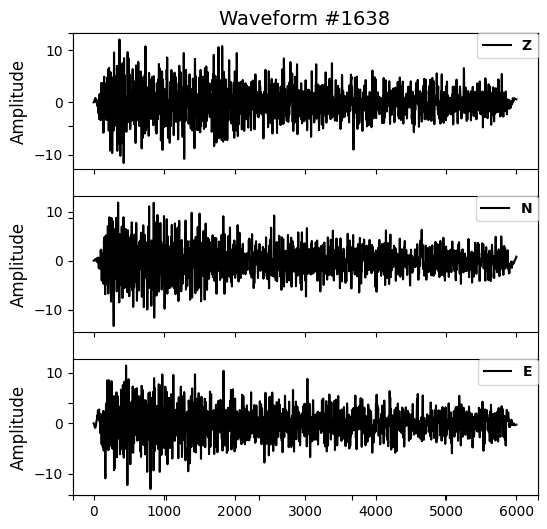

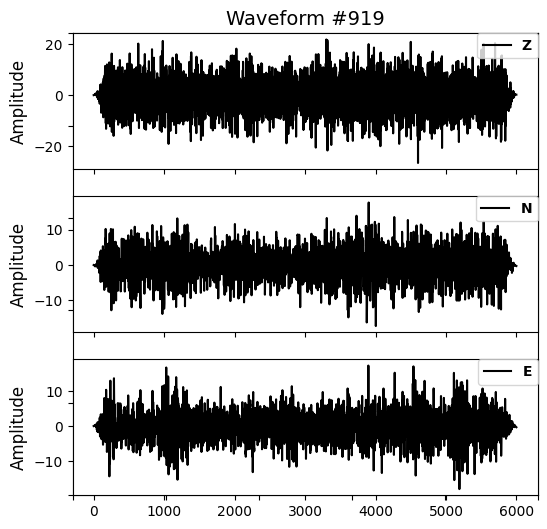

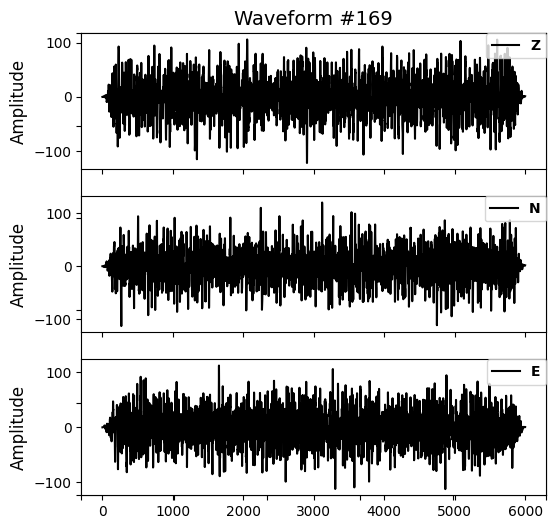

In [7]:
plot(noise,10,1,'./noise/')

In [8]:
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers import Reshape
from keras.layers import GlobalAveragePooling1D


from keras.layers.convolutional import MaxPooling1D
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import concatenate

signal1=np.swapaxes(np.swapaxes(signal,0,2),1,2)
noise1=np.swapaxes(np.swapaxes(noise,0,2),1,2)
labels=np.ones([signal1.shape[0],1])
labeln=np.zeros([noise1.shape[0],1])

data=np.concatenate([signal1,noise1],axis=0)
label=np.concatenate([labels,labeln],axis=0)
label = to_categorical(label)


nsample=100;
data=np.concatenate([signal1[0:nsample,:,:],noise1[0:nsample,:,:]],axis=0)
label=np.concatenate([labels[0:nsample],labeln[0:nsample]],axis=0)
label = to_categorical(label)

In [ ]:
import pyntfa as ntfa
datas=data[0:nsample*2]
dds=[]
n1=6000
for ii in range(np.shape(datas)[0]):
    print(ii,np.shape(datas)[0])
    dtmp,basis,w0,dw,nw = ntfa.ntfa1d(datas[ii,:,0],dt=1,niter=10,rect=20,ifb=1,inv=0)
    dtmp=dtmp.reshape([n1,nw,2],order='F');dtf0=dtmp[:,:,0]*dtmp[:,:,0]+dtmp[:,:,1]*dtmp[:,:,1];
    
    dtmp,basis,w0,dw,nw = ntfa.ntfa1d(datas[ii,:,1],dt=1,niter=10,rect=20,ifb=1,inv=0)
    dtmp=dtmp.reshape([n1,nw,2],order='F');dtf1=dtmp[:,:,0]*dtmp[:,:,0]+dtmp[:,:,1]*dtmp[:,:,1];
    
    dtmp,basis,w0,dw,nw = ntfa.ntfa1d(datas[ii,:,2],dt=1,niter=10,rect=20,ifb=1,inv=0)
    dtmp=dtmp.reshape([n1,nw,2],order='F');dtf2=dtmp[:,:,0]*dtmp[:,:,0]+dtmp[:,:,1]*dtmp[:,:,1];
    
    nf=10
    dtf0=dtf0[:,np.linspace(100,300,nf,dtype='int')].reshape([1,n1,nf,1])
    dtf1=dtf1[:,np.linspace(100,300,nf,dtype='int')].reshape([1,n1,nf,1])
    dtf2=dtf2[:,np.linspace(100,300,nf,dtype='int')].reshape([1,n1,nf,1])
    dout=np.concatenate([dtf0,dtf1,dtf2],axis=3)
    
    dds.append(dout)
    
datanew=np.concatenate(dds,axis=0)



0 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
1 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
2 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
3 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
4 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
5 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
6 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
7 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
8 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
9 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
10 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
11 200
6000
dimension consistent
6000
dimension consistent
6000
dimension c

6000
dimension consistent
57 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
58 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
59 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
60 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
61 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
62 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
63 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
64 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
65 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
66 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
67 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
68 200
6000
dimension consistent
6000
d

113 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
114 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
115 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
116 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
117 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
118 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
119 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
120 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
121 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
122 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
123 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
124 200
6000
dimension consistent
6000
dimension consi

6000
dimension consistent
6000
dimension consistent
170 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
171 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
172 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
173 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
174 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
175 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
176 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
177 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
178 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
179 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
180 200
6000
dimension consistent
6000
dimension consistent
6000
dimension consistent
18

In [ ]:
# First run, please uncomment below

np.save('datanew%d'%(nsample*2),datanew)
# datanew=np.load('./datanew%d.npy'%(nsample*2))

In [ ]:
# datanew.shape
# labelnew=label[0:nsample*2]
labelnew=label;

In [ ]:
ind1=1;
plt.subplot(1,2,1)
plt.imshow(datanew[ind1,:,:,:].reshape([n1,nf*3]),aspect='auto')
plt.title('TF of waveform sample #%d'%ind1)
plt.ylabel('Time (sample)');plt.xlabel('Frequency sample (%d freqs for each comp)'%nf);
ax=plt.subplot(1,6,4)
plt.plot(data[ind1,:,0],np.linspace(0,n1-1,n1),'k')
plt.gca().invert_yaxis();plt.setp(ax.get_yticklabels(), visible=False);plt.setp(ax.get_xticklabels(), visible=False);
plt.xlabel('Z');

ax=plt.subplot(1,6,5)
plt.plot(data[ind1,:,1],np.linspace(0,n1-1,n1),'k')
plt.gca().invert_yaxis();plt.setp(ax.get_yticklabels(), visible=False);plt.setp(ax.get_xticklabels(), visible=False);
plt.xlabel('X');

ax=plt.subplot(1,6,6)
plt.plot(data[ind1,:,2],np.linspace(0,n1-1,n1),'k')
plt.gca().invert_yaxis();plt.setp(ax.get_yticklabels(), visible=False);plt.setp(ax.get_xticklabels(), visible=False);
plt.xlabel('Y');

plt.show()



In [ ]:
ind1=101;
plt.subplot(1,2,1)
plt.imshow(datanew[ind1,:,:,:].reshape([n1,nf*3]),aspect='auto')
plt.title('TF of waveform sample #%d'%ind1)
plt.ylabel('Time (sample)');plt.xlabel('Frequency sample (%d freqs for each comp)'%nf);
ax=plt.subplot(1,6,4)
plt.plot(data[ind1,:,0],np.linspace(0,n1-1,n1),'k')
plt.gca().invert_yaxis();plt.setp(ax.get_yticklabels(), visible=False);plt.setp(ax.get_xticklabels(), visible=False);
plt.xlabel('Z');

ax=plt.subplot(1,6,5)
plt.plot(data[ind1,:,1],np.linspace(0,n1-1,n1),'k')
plt.gca().invert_yaxis();plt.setp(ax.get_yticklabels(), visible=False);plt.setp(ax.get_xticklabels(), visible=False);
plt.xlabel('X');

ax=plt.subplot(1,6,6)
plt.plot(data[ind1,:,2],np.linspace(0,n1-1,n1),'k')
plt.gca().invert_yaxis();plt.setp(ax.get_yticklabels(), visible=False);plt.setp(ax.get_xticklabels(), visible=False);
plt.xlabel('Y');

plt.show()

In [ ]:
## TF-backed learning

X_train, X_test, y_train, y_test = train_test_split(datanew, labelnew, test_size=0.2, random_state=42)
model = Sequential()
model.add(Flatten(input_shape=(6000, nf, 3)))
model.add(Dense(1000, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20,validation_data=([X_test],y_test), shuffle=True, batch_size=32)

In [ ]:
## Non-TF-backed learning (smaller size)
X_train, X_test, y_train, y_test = train_test_split(data, labelnew, test_size=0.2, random_state=42)
model = Sequential()
model.add(Flatten(input_shape=(6000, 3)))
model.add(Dense(1000, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20,validation_data=([X_test],y_test), shuffle=True, batch_size=32)

In [ ]:
## Non-TF-backed learning (same size)

datanew2=datanew.copy();
for ii in range(nf):
    datanew2[:,:,ii,:] = data[:,:,:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(datanew2, labelnew, test_size=0.2, random_state=42)
model = Sequential()
model.add(Flatten(input_shape=(6000, nf, 3)))
model.add(Dense(1000, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20,validation_data=([X_test],y_test), shuffle=True, batch_size=32)